In [154]:
import pandas as pd
import glob, os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

basedir = '/Users/simon/Work/ECOSAT3/DATA/Dredges/'


gpd.read_file('/Users/simon/Work/ECOSAT3/DATA/Dredges/DR01/shapefile/dredge_01_events.shp')

,Time (EADT,Wire out (,Depth (m),Latitude,Longitude,Comments,geometry
0,13:55,0,2263,-20.826517,154.349117,Dredge in water,POINT (154.349117 -20.826517)
1,14:45,2153,2153,-20.821050,154.349117,None,POINT (154.349117 -20.82105)
2,14:55,2700,1951,-20.820000,154.378417,Start bringing cable in at 1m/min to enable te...,POINT (154.378417 -20.82)
3,15:09,2560,1851,-20.818920,154.380283,"Ship stationary, start hauling in at 30m/min",POINT (154.380283 -20.81892)
4,15:18,2150,1875,-20.818420,154.380533,Spikes to >7tn,POINT (154.380533 -20.81842)
5,15:30,1742,1873,-20.817700,154.380933,"Dredge off bottom, no more spikes",POINT (154.380933 -20.8177)


['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR01/shapefile/dredge_01_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR02/shapefile/Dredge02_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR03/shapefile/dredge_03_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR04/shapefile/Dredge_04shapefile.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR05/shapefile/dredge_05_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR06/shapefile/dredge_06_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR07/shapefiles/dredge_07_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR08/shapefiles/dredge_08_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR09/shapefiles/dredge_09_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR10/shapefiles/dredge_10_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR11/shapefiles/dredge_11_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/Dredges//DR12/shapefiles/dredge_12_events.shp']
['/Users/simon/Work/ECOSAT3/DATA/

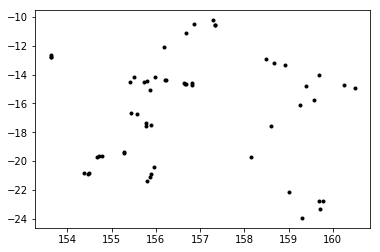

{'30': (155.80727272727273, -14.450545454545454), '54': (159.71922619047618, -23.346809523809526), '42': (158.91483333333332, -13.319399999999998), '48': (159.24718333333334, -16.10456666666667), '45': (160.24249999999998, -14.702604166666667), '43': (159.69073148148144, -14.031759259259259), '49': (158.59476666666666, -17.559433333333335), '52': (159.6796, -22.786399999999997), '53': (159.77060256410257, -22.758897435897435), '02': (154.476431, -20.925583333333332), '03': (154.47758636363636, -20.79786212121212), '26': (155.97677083333335, -14.188375), '01': (154.36973333333336, -20.8204345), '06': (155.8881388888889, -20.926105555555555), '07': (155.9505111111111, -20.40163925925926), '04': (155.80133700000002, -21.40543857142857), '05': (155.87635666666665, -21.071703333333332), '46': (160.49786904761905, -14.91222619047619), '47': (159.57042424242425, -15.727424242424245), '08': (154.72047619047618, -19.646440476190474), '09': (154.6613561111111, -19.710305555555557), '28': (155.49

In [158]:
#print glob.glob('%s/DR*')
#print os.listdir(basedir)

Dredge_Dict = {}

for j in range(1,56):
    dredge_folder_name = 'DR%02d' % j
    
    #shapefile = '%s/%s/shapefile/dredge_%02d_events.shp' % (basedir,dredge_folder_name,j)
    shapefile = glob.glob('%s/%s/shapefile/*.shp' % (basedir,dredge_folder_name))
    if len(shapefile)==0:
        shapefile = glob.glob('%s/%s/Shapefile/*.shp' % (basedir,dredge_folder_name))
    if len(shapefile)==0:
        shapefile = glob.glob('%s/%s/shapefiles/*.shp' % (basedir,dredge_folder_name))
    
    print shapefile
    Events = gpd.read_file(shapefile[0])
    
    #print Events
    
    dredge_path_X = []
    dredge_path_Y = []
    try:
        for geometry in Events.geometry:
            if geometry is not None:
                dredge_path_X.append(geometry.xy[0])
                dredge_path_Y.append(geometry.xy[1])
        #dredge_path_X = [geometry.xy[0] for geometry in Events.geometry]
        #dredge_path_Y = [geometry.xy[1] for geometry in Events.geometry]
        #print dredge_path_X
        #plt.plot(dredge_path_X,dredge_path_Y,'k.')
        Dredge_Dict['%02d' % j] = (np.mean(dredge_path_X),np.mean(dredge_path_Y))
        plt.plot(np.mean(dredge_path_X),np.mean(dredge_path_Y),'k.')
                
    except:
        print 'failed for DR%02d' % j
        #print Events.geometry
        print 
    
plt.show()

print Dredge_Dict
    

In [168]:
rock_descriptions = pd.read_csv('../ELOG/in2019_v04_rocks_elog.csv')

rock_descriptions.Dredge = rock_descriptions.Dredge.str.replace('DR49','D49', regex=False)
rock_descriptions.Dredge = rock_descriptions.Dredge.str.replace('D12 ','D12', regex=False)
rock_descriptions.Dredge = rock_descriptions.Dredge.str.replace('D55 ','D55', regex=False)
rock_descriptions.Dredge = rock_descriptions.Dredge.str.replace('D91','D53', regex=False)

print rock_descriptions.Dredge.unique()

print rock_descriptions.columns




['D36' 'D48' 'D55' 'D54' 'D53' 'D52' 'D51' 'DR50' 'Dr50' 'D41' 'D49' 'D47'
 'D45' 'D44' 'D43' 'D42' 'D37' 'D35' 'D32' 'D34' 'D33' 'D30' 'D29' 'D28'
 'D27' 'D26' 'D25' 'D24' 'D21' 'D18' 'D17' 'D16' 'D15' 'D14' 'D13' 'D12'
 'D11' 'D10' 'D09' 'D08' 'D07' 'D06' 'D04' 'D03' 'D02' 'D01']
Index([u'Message ID', u'Date', u'Sample number', u'Dredge',
       u'Sample Number Assigned',
       u'Sample photographed (include scale and sample number)',
       u'Number of photos', u'Sample sawn', u'Sticker', u'Colour',
       u'Composition', u'Alteration', u'Phenocryst mineralogy',
       u'Phenocryst abundance (%)', u'Phenocryst size range (mm)',
       u'Groundmass', u'Features', u'Vesicle abundance',
       u'Vesicle Filling (%)', u'Vesicle fill', u'Grain size', u'Grain shape',
       u'Sorting', u'Components', u'Cement', u'Sample bagged',
       u'Bucket number', u'Rock name', u'Requested', u'Comments'],
      dtype='object')


In [169]:
print rock_descriptions['Rock name']



0             Mudstone with crystalline filled fractures
1                               Altered Vesicular Basalt
2                                Fossiliferous limestone
3                               Fossiliferous limestone.
4                                            Coral piece
5                                            Coral piece
6                                Fossiliferous limestone
7                                Fossiliferous limestone
8                        Porous fossiliferous limestone.
9                          Fossiliferous limestone coral
10                               Fossiliferous limestone
11                               Fossiliferous packstone
12     Well sorted carbonate grainstone. Mn patches. ...
13                               Fossiliferous limestone
14                                Fossiliferous rudstone
15                             Halimenda bindstone block
16                                 Fossilerous limestone
17                  Coral base 

In [170]:
rock_descriptions = rock_descriptions.assign(Longitude=np.nan,Latitude=np.nan)

for DredgeNumberString in rock_descriptions.Dredge.unique():
    
    DredgeNumber = DredgeNumberString[-2:]
    print DredgeNumber
    
    ind = np.where(rock_descriptions.Dredge.str.match(DredgeNumberString))
    #print ind
    rock_descriptions.Longitude.iloc[ind] = Dredge_Dict[DredgeNumber][0]
    rock_descriptions.Latitude.iloc[ind] = Dredge_Dict[DredgeNumber][1]

#rock_descriptions


36
48
55
54
53
52
51
50
50
41
49
47
45
44
43
42
37
35
32
34
33
30
29
28
27
26
25
24
21
18
17
16
15
14
13
12
11
10
09
08
07
06
04
03
02
01


In [175]:
df_basalt = rock_descriptions[rock_descriptions['Rock name'].str.contains('basalt')]
print df_basalt.Dredge.unique()

df_feldspar = rock_descriptions[rock_descriptions['Rock name'].str.contains('feldspar')]
#df_feldspar.Dredge.unique()

df_volcanic = rock_descriptions[rock_descriptions['Rock name'].str.contains('volcanic')]
print df_volcanic.Dredge.unique()

#df_volcanic = rock_descriptions[rock_descriptions['Rock name'].str.contains('volcanic')]
#df_volcanic.Dredge.unique()


['D55' 'D54' 'D53' 'D41' 'D49' 'D48' 'D45' 'D44' 'D43' 'D42' 'D37' 'D36'
 'D35' 'D32' 'D33' 'D30' 'D29' 'D28' 'D27' 'D25' 'D24' 'D18' 'D17' 'D15'
 'D13' 'D12' 'D11' 'D10' 'D08' 'D06' 'D04' 'D03']
['D36' 'D37' 'D34' 'D33' 'D29' 'D15' 'D12' 'D11' 'D07' 'D04' 'D03']


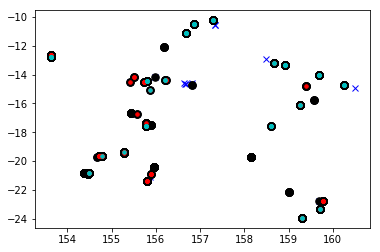

In [172]:
plt.plot([Dredge_Dict[item][0] for item in Dredge_Dict],[Dredge_Dict[item][1] for item in Dredge_Dict],'bx')
plt.plot(rock_descriptions.Longitude,rock_descriptions.Latitude,'k.',markersize=15)
plt.plot(df_basalt.Longitude,df_basalt.Latitude,'r.',markersize=7,zorder=2)
plt.plot(df_feldspar.Longitude,df_feldspar.Latitude,'c.',markersize=7,zorder=2)



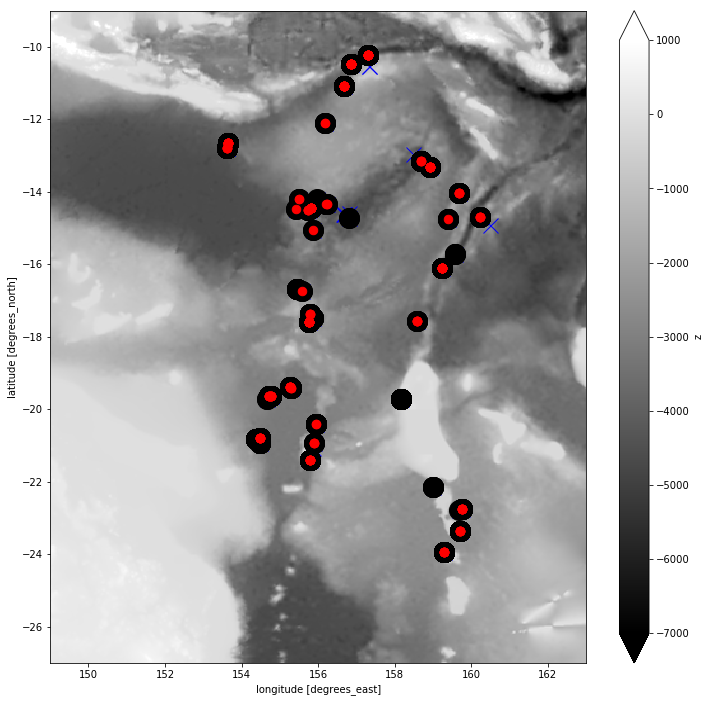

In [173]:
ds = xr.open_dataset('/Users/simon/Data/GMTdata/hawaii2017/earth_relief_02m.grd')

plt.figure(figsize=(12,12))
ds['z'].plot(vmin=-7000,vmax=1000,cmap=plt.cm.gray)
plt.plot([Dredge_Dict[item][0] for item in Dredge_Dict],[Dredge_Dict[item][1] for item in Dredge_Dict],'bx',markersize=15)
plt.plot(rock_descriptions.Longitude,rock_descriptions.Latitude,'ko',markersize=20)
plt.plot(df_basalt.Longitude,df_basalt.Latitude,'r.',markersize=17,zorder=2)
plt.plot(df_volcanic.Longitude,df_volcanic.Latitude,'r.',markersize=17,zorder=2)
#plt.plot(df_feldspar.Longitude,df_feldspar.Latitude,'c.',markersize=7,zorder=2)
plt.xlim(149,163)
plt.ylim(-27,-9)
plt.show()
